In [24]:
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import data
from tensorflow.keras import Sequential, datasets, layers, models, losses, metrics

### Load fashion MNIST dataset

In [25]:
(train_images,train_labels),(test_images,test_labels)=datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Investigate the dataset

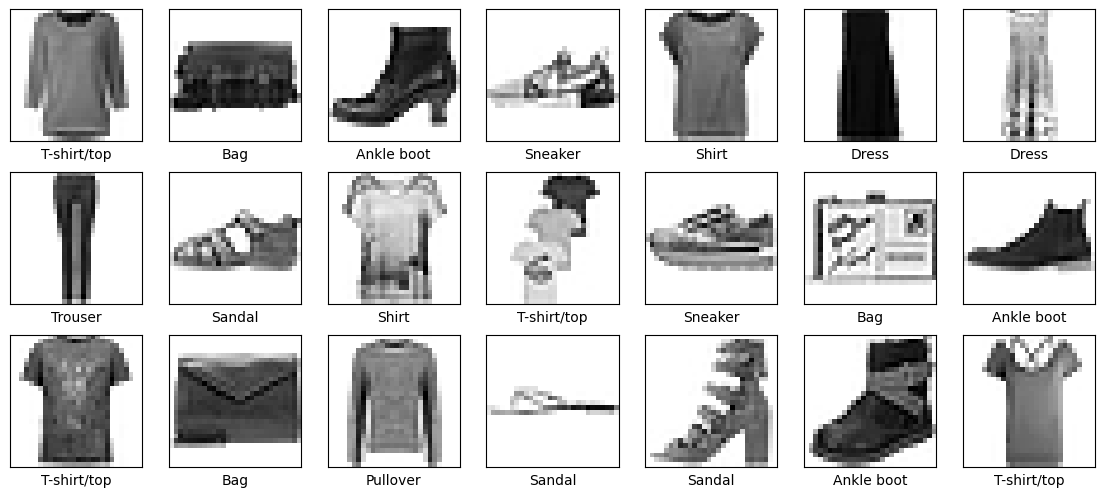

In [26]:
random.seed(1)
train_ids = list(range(len(train_labels)))
sample_ids = random.sample(train_ids,21)

plt.figure(figsize=[14,6])
for iindex in range(len(sample_ids)):
    plt.subplot(3,7,iindex+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[sample_ids[iindex]],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[sample_ids[iindex]]])
    
plt.show()

In [27]:
print("Training Data Distribution")
unique_elem,number_of_elem=np.unique(train_labels,return_counts=True)
print(np.c_[unique_elem.T,number_of_elem.T])

print("Test Data Distribution")
unique_elem,number_of_elem=np.unique(test_labels,return_counts=True)
print(np.c_[unique_elem.T,number_of_elem.T])

train_dataset_size = len(train_labels)
validation_dataset_size = 5000
test_dataset_size = 5000

Training Data Distribution
[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]
Test Data Distribution
[[   0 1000]
 [   1 1000]
 [   2 1000]
 [   3 1000]
 [   4 1000]
 [   5 1000]
 [   6 1000]
 [   7 1000]
 [   8 1000]
 [   9 1000]]


In [28]:
print(train_images.shape)
print(np.max(train_images))
print(np.min(train_images))

(60000, 28, 28)
255
0


### Preprocess the dataset
-   Normalize 
-   Form datasets
    -   Train
    -   Validation
    -   Test
-   Shuffle and create Batches for training

In [29]:
normalization_factor = np.max(train_images)
train_images = train_images/normalization_factor
test_images = test_images/normalization_factor

In [30]:
train_dataset = data.Dataset.from_tensor_slices((train_images,train_labels))
validation_dataset = data.Dataset.from_tensor_slices((test_images[:validation_dataset_size],test_labels[:validation_dataset_size]))
test_dataset = data.Dataset.from_tensor_slices((test_images[test_dataset_size:],test_labels[test_dataset_size:]))

In [31]:
train_dataset = train_dataset.shuffle(train_dataset_size).batch(128)
validation_dataset = validation_dataset.batch(128)
test_dataset = test_dataset.batch(128)

### Build the model

In [32]:
model = Sequential(
    [
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(512,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(10),
    ]
)

### Compile the model

In [33]:
model.compile(
    optimizer = 'Adam',
    loss = losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

### Fit the model

In [40]:
model.fit(train_dataset,
          epochs=50,
          validation_data=validation_dataset)

Epoch 1/50


469/469 [==============================] - 5s 10ms/step - loss: 0.2154 - accuracy: 0.9190 - val_loss: 0.3256 - val_accuracy: 0.8874
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.2098 - accuracy: 0.9199 - val_loss: 0.3399 - val_accuracy: 0.8858
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1993 - accuracy: 0.9246 - val_loss: 0.3508 - val_accuracy: 0.8852
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1905 - accuracy: 0.9270 - val_loss: 0.3384 - val_accuracy: 0.8852
Epoch 5/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1848 - accuracy: 0.9291 - val_loss: 0.3395 - val_accuracy: 0.8910
Epoch 6/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1778 - accuracy: 0.9326 - val_loss: 0.3844 - val_accuracy: 0.8870
Epoch 7/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1705 - accuracy: 0.9355 - val_loss: 0.3699 - val_accuracy: 0.8870
Epoch 8/50

### Evaluate on Test

In [41]:
loss, accuracy = model.evaluate(test_dataset)
print(f'The model cross entropy loss is {loss:0.4f}')
print(f'The model accuracy is {accuracy * 100:0.1f}%')

 1/40 [..............................] - ETA: 0s - loss: 0.4945 - accuracy: 0.8828

40/40 [==============================] - 0s 4ms/step - loss: 0.6038 - accuracy: 0.8962
The model cross entropy loss is 0.6038
The model accuracy is 89.6%


In [42]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [43]:
predicted_labels = np.argmax(predictions,axis=1)
inaccurate_results = np.arange(predicted_labels.shape[0])[predicted_labels!=test_labels]

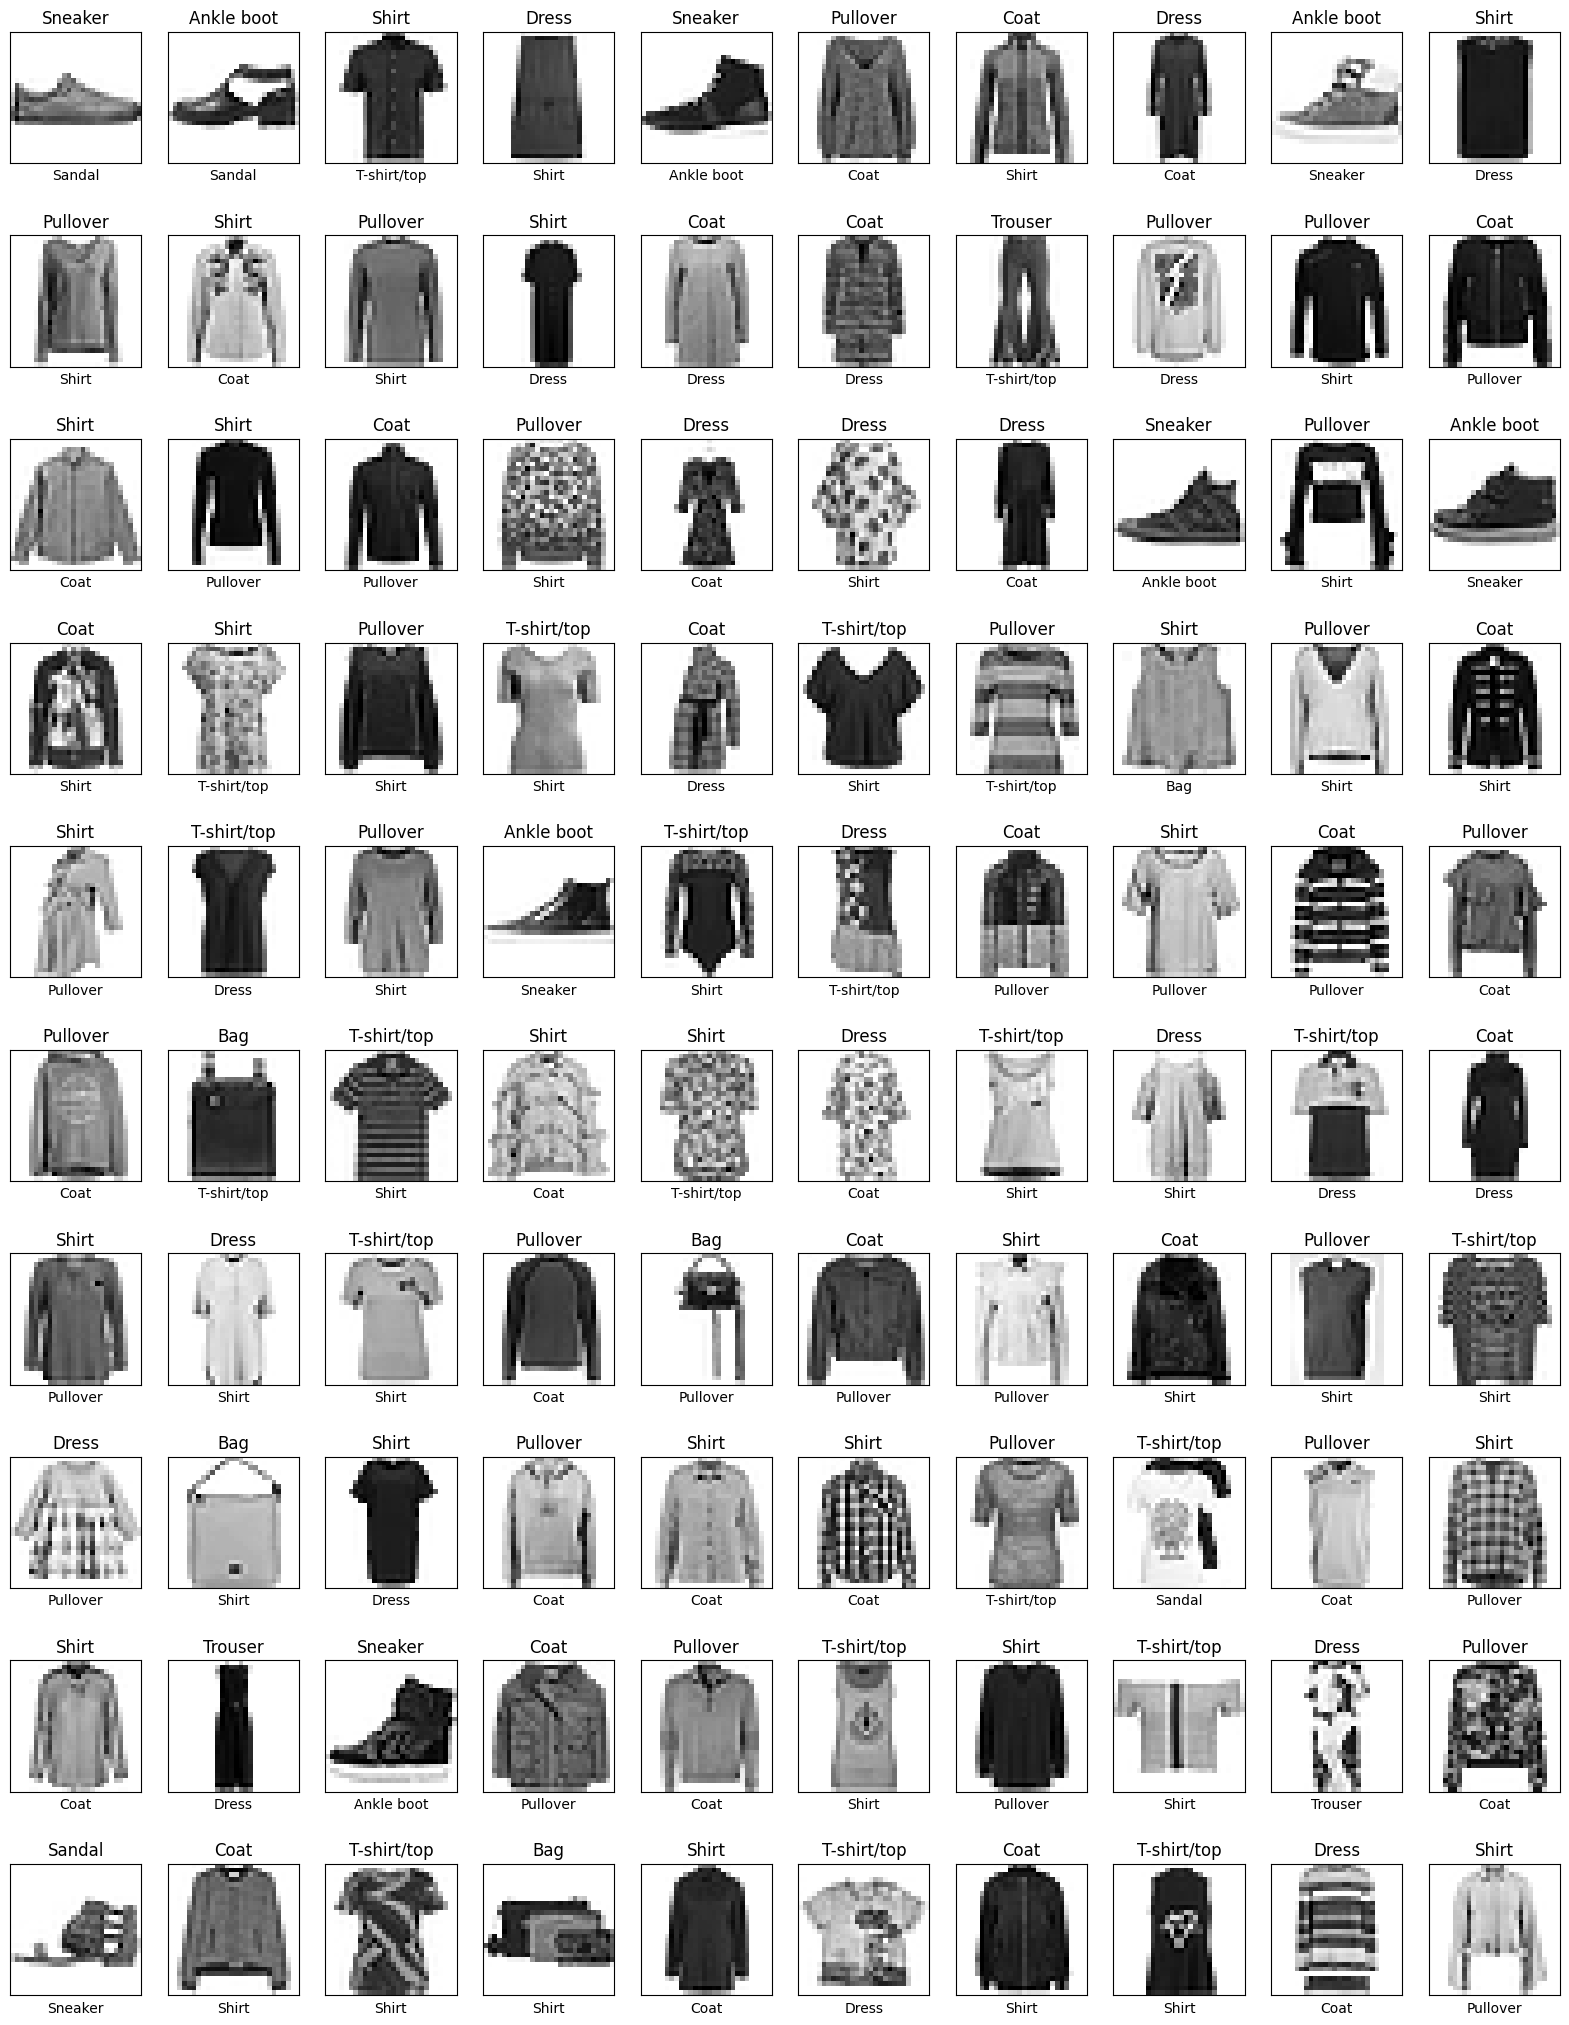

In [44]:
count=1
plt.figure(figsize=[20,26])
for iindex in inaccurate_results[:100]:
    plt.subplot(10,10,count)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[iindex],cmap=plt.cm.binary)
    plt.title(class_names[test_labels[iindex]])
    plt.xlabel(class_names[predicted_labels[iindex]])
    count=count+1